In [39]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, fftshift, rfft

In [40]:
fs = 1
N = 10
t = np.linspace(0, N/fs, N, endpoint=False)
#print(t[0:10:1])

In [41]:
f = 0.1
a = 1
dc = 0
signal = a*np.sin(2*np.pi*f*t/fs) + dc

[ 0.00000000e+00  5.87785252e-01  9.51056516e-01  9.51056516e-01
  5.87785252e-01  1.22464680e-16 -5.87785252e-01 -9.51056516e-01
 -9.51056516e-01 -5.87785252e-01]


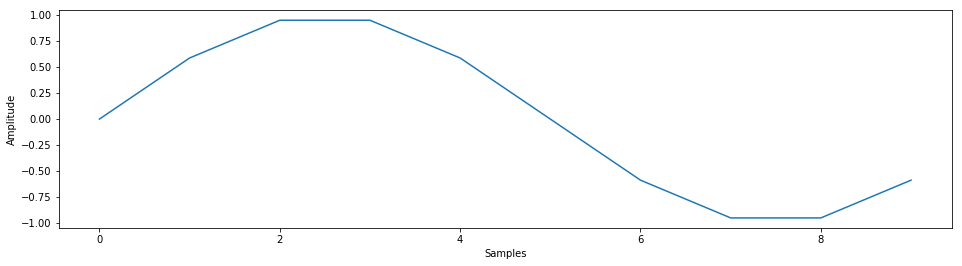

In [42]:
plt.figure(figsize=(16, 4))
#plt.subplot(1, 2, 1)
plt.plot(signal)
plt.ylabel('Amplitude')
plt.xlabel('Samples')
plt.show()

In [53]:
Es = 1/(len(signal))*np.sum(np.abs(np.square(signal)))
print(Es)

0.5000000000000001


In [54]:
SNR_dB = 30
SNR_lin = np.power(10,(SNR_dB/10))
print(SNR_lin)

1000.0


In [73]:
# noise = np.sqrt(Es/SNR_lin)*np.random.randn(1,len(signal))
noise = np.random.randn(1,10000)[0]
#print(noise)
print(np.mean(noise))

0.010960563308446435


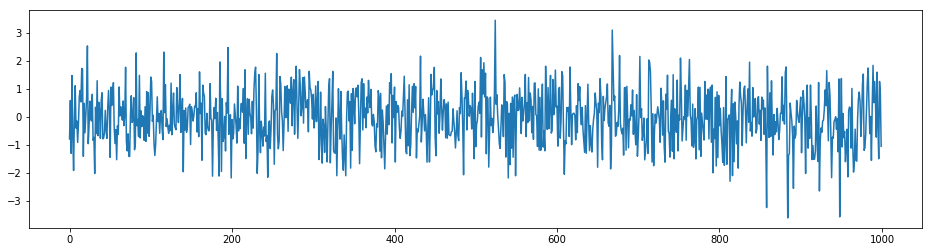

In [71]:
plt.figure(figsize=(16, 4))
plt.plot(noise)
plt.show()